In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

## Example with generated data

Problem: customer segmentation for a marketing campaign of an app. For a group of 20 people, we have their age and their weekly hours of app usage

In [2]:
age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]

In [3]:
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


<AxesSubplot:xlabel='age', ylabel='hours'>

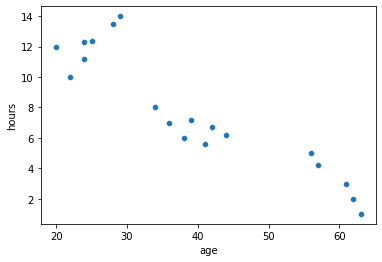

In [4]:
sns.scatterplot(x = df['age'], y = df['hours'])

#### Using two clusters

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [6]:
# Predicting / assigning the clusters:
df_cl = df
df_cl['clusters'] = kmeans.predict(df)

# Check the size of the clusters
print(df_cl['clusters'].value_counts().sort_index())


0    7
1    5
2    7
Name: clusters, dtype: int64


[0 1 2]


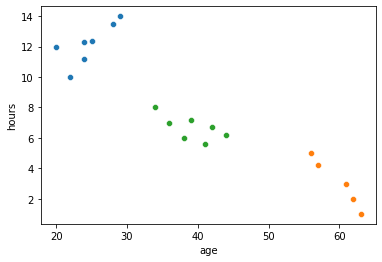

In [7]:
clusterval = np.unique(df['clusters'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

#### Using different number of clusters

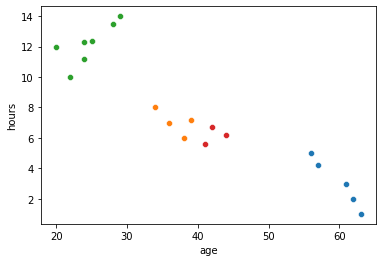

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

df_cl['clusters'] = kmeans.predict(df)

clusterval = np.unique(df['clusters'])
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

## Using data

In [9]:
from sklearn import datasets

data = datasets.load_wine()
print(data.keys())
print(data['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:     

In [10]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
#this data ALSO has a target variable for supervised learning problems, but this is not what we are interested in here!


In [11]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep, columns = X.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### We will run a K-Means clustering with 8 clusters (random choice).

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

For best practice, we will also specifiy a value for random_state. Specifying this is just used for reproducing the same results on every run - since the K-Means algorithm is stochastic, we will otherwise get slightly different results each time even if parameters are the same, so fixing it makes it easier to compare. 

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [14]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
print(pd.Series(clusters).value_counts().sort_index())

# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

0    18
1    23
2    17
3    29
4    23
5    26
6     4
7    38
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Basic Performance value: 'inertia'.
'Inertia' is the mean squared distance between each instance and its closest centroid.

In [15]:
kmeans.inertia_

938.6711756898961

### Choosing a value for K

Elbow plot using inertia

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

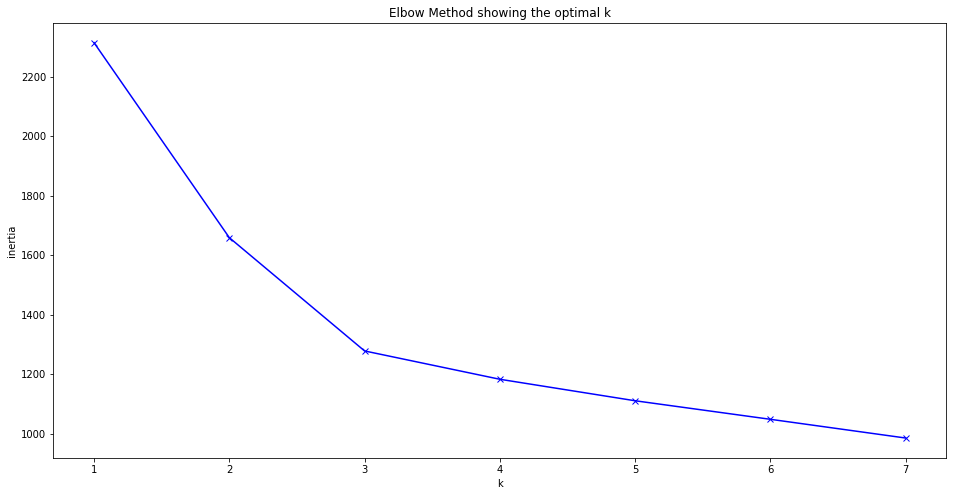

In [16]:
K = range(1, 8)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at k=3.
Do not take this plot as the ultimate source of truth, but also look at your business needs - what if our business needs involve having a k between say 4 and 8?

There is also another metric that will help us decide.

#### Silhouette Score

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

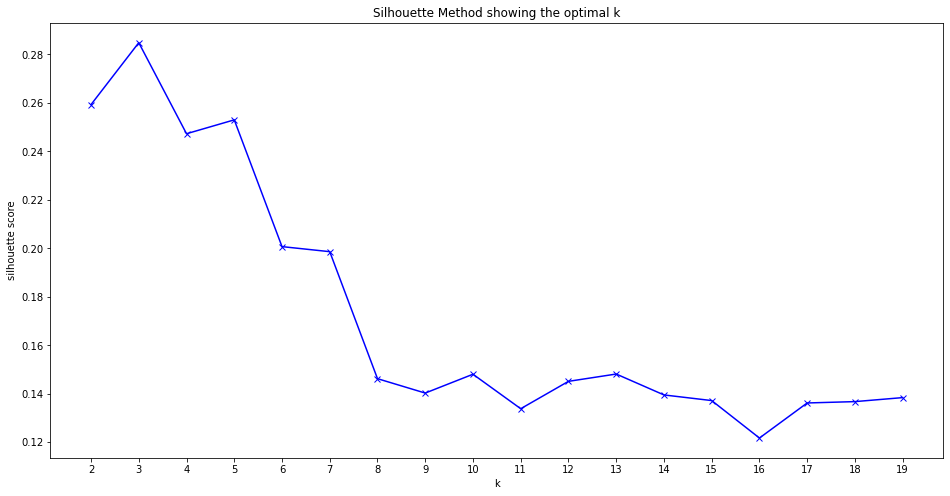

In [17]:
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')



You can see that the silhouette score also has an upward spike at 3! If our business requires us to have between 4 and 8 clusters, then according to this plot 5 would be the optimal number.